Applies models to all feeders

In [1]:
import numpy as np
import time
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared = False), greater_is_better=False)

from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)

In [2]:
Feed_names = ['1 1', '1 2', '1 3', '1 4', '2 1', '2 2', '2 3', '2 4', '2 5', '3 1', '3 2', '3 3', '3 4', '3 5', '3 6', '4 1', '4 2', '4 3', '4 4', '4 5', '4 6', '5 1', '5 2', '5 3', '5 4', '5 5', '5 6', '5 7', '5 8', '6 1', '6 2', '7 1', '7 2', '7 3', '7 4', '7 5', '7 6', '7 7', '8 1', '8 2', '9 1', '9 2', '9 3', '9 4', '9 5', '9 6', '10 1', '10 2', '10 3', '10 4', '10 5', '10 6', '11 1', '11 2', '11 3', '11 4', '11 5', '12 1', '12 2', '12 3', '13 1', '13 2', '13 3', '13 4', '14 1', '14 2', '14 3', '14 4', '14 5', '14 6', '15 1', '15 2', '15 3', '15 4', '15 5', '15 6', '15 7', '16 1', '16 2', '16 3', '16 4', '17 1', '17 2', '17 3', '17 4', '17 5', '17 6', '17 7', '18 1', '18 2', '18 3', '18 4', '18 5', '18 6', '18 7', '18 8', '18 9', '19 1', '19 2', '19 3', '19 4', '19 5', '20 1', '20 2', '20 3', '20 4', '20 5', '21 1', '21 2', '21 3', '21 4', '21 5', '22 1', '22 2', '22 3', '22 4', '22 5', '22 6', '23 1', '23 2', '23 3', '23 4', '23 5', '24 1', '24 2', '25 1', '25 2', '25 3']

In [3]:
Feed_names.index("17 7")

87

# Training

In [ ]:
Train = False

In [5]:
if Train:
    regressor = TransformedTargetRegressor(
        regressor = linear_model.LinearRegression(),
        transformer = StandardScaler(with_mean = True, with_std = True)
        )
    #
    #("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),
    #("preprocess_tr",PowerTransformer(method = "yeo-johnson")),
    pipeline = Pipeline(
        steps = [
            ("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),
            ("target_transform", regressor)
        ])


'\nregressor = TransformedTargetRegressor(\n    regressor = linear_model.LinearRegression(),\n    transformer = StandardScaler(with_mean = True, with_std = True)\n    )\n#\n#("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),\n#("preprocess_tr",PowerTransformer(method = "yeo-johnson")),\npipeline = Pipeline(\n    steps = [\n        ("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),\n        ("target_transform", regressor)\n    ])\n'

In [6]:
if Train:
    count = 0
    for net in range(1,27):
        feed = 0
        while True:
            feed +=1
            start_time = time.time()
            #Load datasets
            try:
                # 10% data
                with open(f"Simulation_Results_10/Loads_Network_{net}_Feeder_{feed}.npy", 'rb') as f:
                    Dataset_10 = np.load(f, allow_pickle = True)
                with open(f"Simulation_Results_10/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:
                    Targets_10 = np.load(f, allow_pickle = True)
                # 30% data
                with open(f"Simulation_Results_30/Loads_Network_{net}_Feeder_{feed}.npy", 'rb') as f:
                    Dataset_30 = np.load(f, allow_pickle = True)
                with open(f"Simulation_Results_30/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:
                    Targets_30 = np.load(f, allow_pickle = True)
                # 50% data
                with open(f"Simulation_Results_50/Loads_Network_{net}_Feeder_{feed}.npy", 'rb') as f:
                    Dataset_50 = np.load(f, allow_pickle = True)
                with open(f"Simulation_Results_50/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:
                    Targets_50 = np.load(f, allow_pickle = True)
                # 70% data
                with open(f"Simulation_Results_70/Loads_Network_{net}_Feeder_{feed}.npy", 'rb') as f:
                    Dataset_70 = np.load(f, allow_pickle = True)
                with open(f"Simulation_Results_70/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:
                    Targets_70 = np.load(f, allow_pickle = True)
                # 100% data
                with open(f"Simulation_Results_100/Loads_Network_{net}_Feeder_{feed}.npy", 'rb') as f:
                    Dataset_100 = np.load(f, allow_pickle = True)
                with open(f"Simulation_Results_100/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:
                    Targets_100 = np.load(f, allow_pickle = True)
            except:
                break
            print(net, feed)
            count += 1
            # hyper parameter selection
            #linear -> none
            # train on 70% and test on 30
            X_train, X_test, y_train, y_test = train_test_split(Dataset_10, 230*Targets_10, test_size=0.3, shuffle = False)
            #linear model
            print("linear ", end = "")

            pipeline.fit(X_train, y_train)
            preds_linear_10 = pipeline.predict(X_test)
            preds_linear_30 = pipeline.predict(Dataset_30)
            preds_linear_50 = pipeline.predict(Dataset_50)
            preds_linear_70 = pipeline.predict(Dataset_70)
            preds_linear_100 = pipeline.predict(Dataset_100)
            results_linear_dict = {
                'Observed_10': y_test,
                'Predicted_10': preds_linear_10,
                'Error_10': preds_linear_10-y_test,
                'Observed_30': 230*Targets_30,
                'Predicted_30': preds_linear_30,
                'Error_30': preds_linear_30-230*Targets_30,
                'Observed_50': 230*Targets_50,
                'Predicted_50': preds_linear_50,
                'Error_50': preds_linear_50-230*Targets_50,
                'Observed_70': 230*Targets_70,
                'Predicted_70': preds_linear_70,
                'Error_70': preds_linear_70-230*Targets_70,
                'Observed_100': 230*Targets_100,
                'Predicted_100': preds_linear_100,
                'Error_100': preds_linear_100-230*Targets_100
            }

            ## Neural Network

            pipeline.set_params(target_transform__regressor = MLPRegressor())

            param_grid = {
            'target_transform__regressor__learning_rate_init': np.linspace(0.001, 0.1, 20),
            'target_transform__regressor__alpha': np.linspace(0.00001, 0.001, 20),
            'target_transform__regressor__hidden_layer_sizes': [[25,], [50,],[100,],[150,]]   
            }

            print("NN params ", end = "")
            grid_search_nn = GridSearchCV(pipeline, param_grid, cv=RepeatedKFold(n_splits=5, n_repeats=2), scoring=rmse_scorer, n_jobs=-1)
            grid_search_nn.fit(X_train, y_train)

            NN_optimal_params = grid_search_nn.best_params_

            print("NN train ", end = "")
            pipeline.set_params(target_transform__regressor__alpha = NN_optimal_params["target_transform__regressor__alpha"])
            pipeline.set_params(target_transform__regressor__hidden_layer_sizes = NN_optimal_params["target_transform__regressor__hidden_layer_sizes"])
            pipeline.set_params(target_transform__regressor__learning_rate_init = NN_optimal_params["target_transform__regressor__learning_rate_init"])
            pipeline.fit(X_train, y_train)

            preds_nn_10 = pipeline.predict(X_test)
            preds_nn_30 = pipeline.predict(Dataset_30)
            preds_nn_50 = pipeline.predict(Dataset_50)
            preds_nn_70 = pipeline.predict(Dataset_70)
            preds_nn_100 = pipeline.predict(Dataset_100)
            results_NN_dict = {
                'Observed_10': y_test,
                'Predicted_10': preds_nn_10,
                'Error_10': preds_nn_10-y_test,
                'Observed_30': 230*Targets_30,
                'Predicted_30': preds_nn_30,
                'Error_30': preds_nn_30-230*Targets_30,
                'Observed_50': 230*Targets_50,
                'Predicted_50': preds_nn_50,
                'Error_50': preds_nn_50-230*Targets_50,
                'Observed_70': 230*Targets_70,
                'Predicted_70': preds_nn_70,
                'Error_70': preds_nn_70-230*Targets_70,
                'Observed_100': 230*Targets_100,
                'Predicted_100': preds_nn_100,
                'Error_100': preds_nn_100-230*Targets_100
            }


            with open(f'/Users/OMalleyAG/Documents/Python/Models/Results/Network_{net}_Feeder_{feed}_linear_results.pkl', 'wb') as file:
                pickle.dump(results_linear_dict, file)

            with open(f'/Users/OMalleyAG/Documents/Python/Models/Results/Network_{net}_Feeder_{feed}_NN_results.pkl', 'wb') as file:
                pickle.dump(results_NN_dict, file)

            end_time = time.time()
            print("Took: ", end_time-start_time, " est. rem (mins): ", (128-count)*(end_time-start_time)/60)

'\ncount = 0\nfor net in range(1,27):\n    feed = 0\n    while True:\n        feed +=1\n        start_time = time.time()\n        #Load datasets\n        try:\n            # 10% data\n            with open(f"Simulation_Results_10/Loads_Network_{net}_Feeder_{feed}.npy", \'rb\') as f:\n                Dataset_10 = np.load(f, allow_pickle = True)\n            with open(f"Simulation_Results_10/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:\n                Targets_10 = np.load(f, allow_pickle = True)\n            # 30% data\n            with open(f"Simulation_Results_30/Loads_Network_{net}_Feeder_{feed}.npy", \'rb\') as f:\n                Dataset_30 = np.load(f, allow_pickle = True)\n            with open(f"Simulation_Results_30/Targets_Network_{net}_Feeder_{feed}.npy", "rb") as f:\n                Targets_30 = np.load(f, allow_pickle = True)\n            # 50% data\n            with open(f"Simulation_Results_50/Loads_Network_{net}_Feeder_{feed}.npy", \'rb\') as f:\n               

# Analysis

In [7]:
data_list = []
for net in range(1,27):
    feed = 0
    while True:
        feed +=1
        #Load datasets
        try:
            with open(f'Models/Results/Network_{net}_Feeder_{feed}_linear_results.pkl', 'rb') as file:
                loaded_results_linear_dict = pickle.load(file)
            data_list.append(loaded_results_linear_dict)
        except:
            break

In [8]:
data_list_nn = []
for net in range(1,27):
    feed = 0
    while True:
        feed +=1
        #Load datasets
        try:
            with open(f'Models/Results/Network_{net}_Feeder_{feed}_NN_results.pkl', 'rb') as file:
                loaded_results_nn_dict = pickle.load(file)
            data_list_nn.append(loaded_results_nn_dict)
        except:
            break

In [9]:
plt.rcParams.update({'font.size': 8})

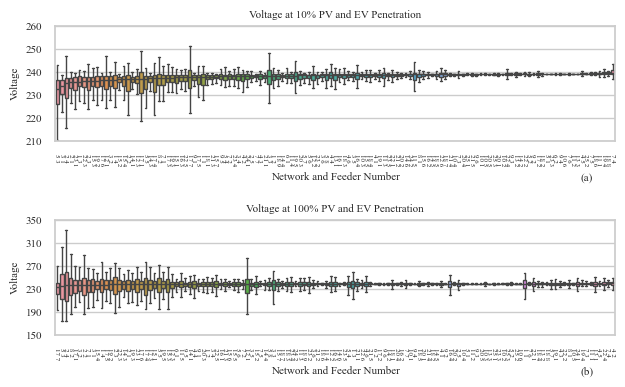

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.3, 4))


all_errors_df = pd.concat([abs(pd.DataFrame(data["Observed_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False, linewidth = 1)

all_errors_df = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False, linewidth = 1)


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Voltage", fontsize = 8)
axes[1].set_ylabel("Voltage", fontsize = 8)

axes[0].set_ylim(210,260)
axes[1].set_ylim(150,350)

axes[0].set_title("Voltage at 10% PV and EV Penetration", fontsize = 8)
axes[1].set_title("Voltage at 100% PV and EV Penetration", fontsize = 8)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

axes[0].set_yticks([210,220,230,240, 250,260], [210,220,230,240, 250,260],fontsize=8)
axes[1].set_yticks([150,190,230,270,310,350], [150,190,230,270,310,350], fontsize=8)

plt.tight_layout()

In [11]:
voltges_10 = pd.concat([abs(pd.DataFrame(data["Observed_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
voltges_100 = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)

print(sum(voltges_100.values.flatten())/len(voltges_100.values.flatten()))
print(np.std(voltges_100.values.flatten()))
print(sum(voltges_10.values.flatten())/len(voltges_10.values.flatten()))
print(np.std(voltges_10.values.flatten()))

238.08541206558573
8.053062732625719
237.79456809728683
2.8777819482062625


# Linear

In [12]:
obs_df = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
pred_lin_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
pred_nn_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)

Error_NN = {}
Error_lin = {}

for coloumn in obs_df:
    Error_linear = []
    Error_nn = []
    for i in range(len(obs_df[coloumn])):
        if 207 < obs_df[coloumn][i] < 253:
            Error_linear.append(abs(obs_df[coloumn][i]-pred_lin_df[coloumn][i]))
            Error_nn.append(abs(obs_df[coloumn][i]-pred_nn_df[coloumn][i]))
    Error_NN[coloumn] = Error_nn
    Error_lin[coloumn] = Error_linear
        

In [13]:
len(list(Error_lin.keys())),len(list(Error_lin.values()))

(127, 127)

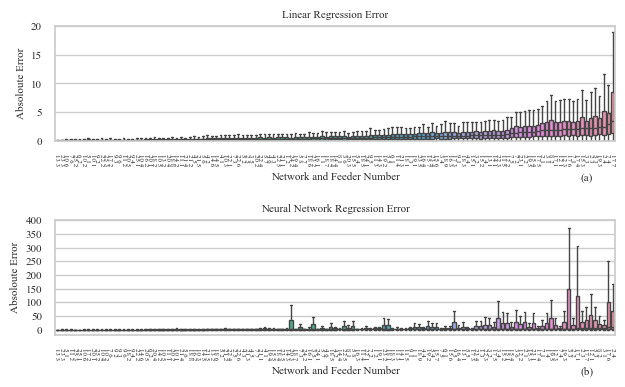

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.3, 4))

all_errors_df_lin = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df_lin = all_errors_df_lin.reindex(all_errors_df_lin.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df_lin, showfliers=False, linewidth = 1)
#axes[0].boxplot(list(Error_lin.values()), labels = list(Error_lin.keys()), showfliers=False)


all_errors_df_nn = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df_nn = all_errors_df_nn.reindex(all_errors_df_nn.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df_nn, showfliers=False, linewidth = 1)
#axes[1].boxplot(list(Error_NN.values()), labels = list(Error_NN.keys()), showfliers=False)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)  


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Absoloute Error", fontsize = 8)
axes[1].set_ylabel("Absoloute Error", fontsize = 8)

axes[0].set_ylim(0,20)
#axes[1].set_ylim(0,20)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

ytick = range(0,25,5)
ytick_1 = range(0,450,50)

axes[0].set_yticks(ytick, ytick,fontsize=8)
axes[1].set_yticks(ytick_1, ytick_1, fontsize=8)

axes[0].set_title("Linear Regression Error",fontsize=8)
axes[1].set_title("Neural Network Regression Error",fontsize=8)

plt.tight_layout()

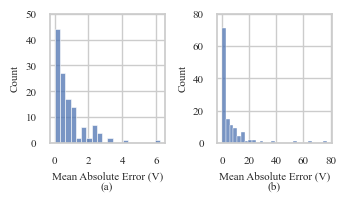

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(3.5, 2.2))
abcd = pd.DataFrame(data = [list(all_errors_df_lin.mean()), list(all_errors_df_nn.mean())], index = ["Linear", "Neural Network"]).T
sns.histplot(ax = axes[0], data = abcd["Linear"])
sns.histplot(ax = axes[1], data = abcd["Neural Network"])
axes[0].set_ylabel("Count", fontsize = 8)
axes[0].set_xlabel("Mean Absolute Error (V)", fontsize = 8)
axes[1].set_ylabel("Count", fontsize = 8)
axes[1].set_xlabel("Mean Absolute Error (V)", fontsize = 8)

axes[0].set_yticks(range(0,60,10), range(0,60,10),fontsize=8)
axes[1].set_yticks(range(0,90,20), range(0,90,20),fontsize=8)
axes[0].set_xticks(range(0,7,2),range(0,7,2),fontsize=8)
axes[1].set_xticks(range(0,90,20), range(0,90,20),fontsize=8)

axes[0].text(0.55, -0.34, '(a)', va='center', ha='right', transform=axes[0].transAxes, fontsize=8)
axes[1].text(0.55, -0.34, '(b)', va='center', ha='right', transform=axes[1].transAxes, fontsize=8)
plt.tight_layout()

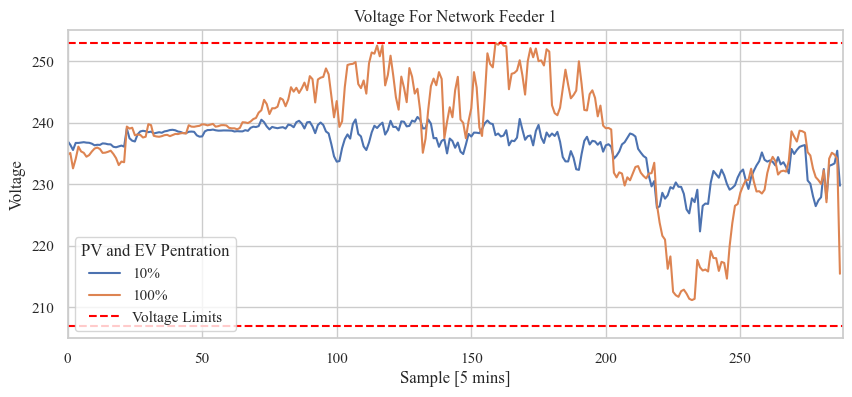

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
sns.lineplot(voltges_10["1 1"].values[:288], label = "10%")
sns.lineplot(voltges_100["1 1"].values[:288], label = "100%")

plt.title("Voltage For Network Feeder 1")
plt.xlabel("Sample [5 mins]")
plt.ylabel("Voltage")
plt.xlim(0, 288)
plt.ylim(205, 255)
plt.axhline(230*1.1, linestyle = "--", color = "red", label = "Voltage Limits")
plt.axhline(230*0.9, linestyle = "--", color = "red")
plt.legend(title = "PV and EV Pentration")

77.37019165362723

In [27]:
# Overall stats
for t in ["10", "30", "50", "70", "100"]:
    error_NN = pd.concat([abs(pd.DataFrame(data[f"Error_{t}"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
    error_lin = pd.concat([abs(pd.DataFrame(data[f"Error_{t}"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)

    flattened_NN = error_NN.values.flatten()
    flattened_lin = error_lin.values.flatten()

    # Calculate the average of all values in the list

    print(t)
    print("Average NN:", sum(flattened_NN) / len(flattened_NN))
    print("max NN", max(error_NN.mean()))
    #print("max lin", max(error_lin.mean()))
    #print("Average lin:", sum(flattened_lin) / len(flattened_lin))
    
    


10
Average NN: 0.11730317234427419
max NN 0.6018089749249729
30
Average NN: 1.1287758816745972
max NN 11.605119491611779
50
Average NN: 2.468201421894637
max NN 25.30483803597143
70
Average NN: 3.886769913004263
max NN 52.09349401723062
100
Average NN: 6.357373162598351
max NN 77.37019165362723



KeyboardInterrupt



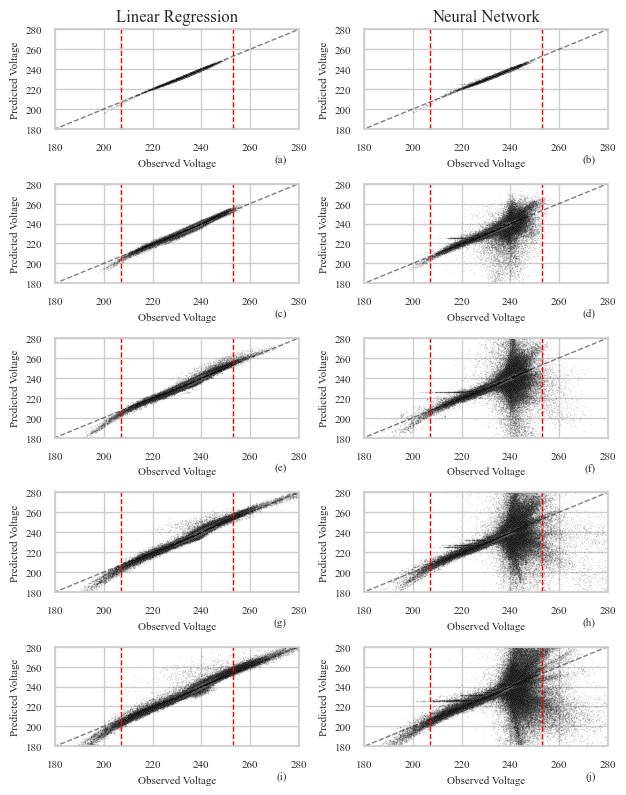

In [18]:
fig, ax = plt.subplots(5,2, figsize = (6.3, 8))

for i in range(5): 
    ax[i][0].axvline(230*1.1, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][0].axvline(230*0.9, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][0].set_xlim(180, 280)
    ax[i][0].set_ylim(180, 280)
    ax[i][0].set_xlabel("Observed Voltage", fontsize = 8)
    ax[i][0].set_ylabel("Predicted Voltage", fontsize = 8)
    
    ax[i][1].axvline(230*1.1, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][1].axvline(230*0.9, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][1].set_xlim(180, 280)
    ax[i][1].set_ylim(180, 280)
    ax[i][1].set_xlabel("Observed Voltage", fontsize = 8)
    ax[i][1].set_ylabel("Predicted Voltage", fontsize = 8)
    
    #ax[i][0].legend(loc = 'upper left', fontsize = 8)
    #ax[i][1].legend(loc = 'upper left', fontsize = 8)
    
    sns.lineplot(ax = ax[i][0], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    sns.lineplot(ax = ax[i][1], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    
    fig_range = [180,200,220,240,260,280]
    ax[i][0].set_xticks(fig_range, fig_range, fontsize=8)
    ax[i][0].set_yticks(fig_range, fig_range, fontsize=8)
    ax[i][1].set_xticks(fig_range, fig_range, fontsize=8)
    ax[i][1].set_yticks(fig_range, fig_range, fontsize=8)

    
    
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(ax = ax[0][0], x = data_list[i]["Observed_10"],y = data_list[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[0][1], x = data_list_nn[i]["Observed_10"],y = data_list_nn[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[1][0], x = data_list[i]["Observed_30"],y = data_list[i]["Predicted_30"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[1][1], x = data_list_nn[i]["Observed_30"],y = data_list_nn[i]["Predicted_30"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[2][0], x = data_list[i]["Observed_50"],y = data_list[i]["Predicted_50"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[2][1], x = data_list_nn[i]["Observed_50"],y = data_list_nn[i]["Predicted_50"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[3][0], x = data_list[i]["Observed_70"],y = data_list[i]["Predicted_70"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[3][1], x = data_list_nn[i]["Observed_70"],y = data_list_nn[i]["Predicted_70"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[4][0], x = data_list[i]["Observed_100"],y = data_list[i]["Predicted_100"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[4][1], x = data_list_nn[i]["Observed_100"],y = data_list_nn[i]["Predicted_100"], alpha = 0.1, color = "black", s = 1)
    

ax[0][0].set_title("Linear Regression", fontsize = 12)
ax[0][1].set_title("Neural Network", fontsize = 12)

ax[0][0].text(0.95, -0.3, '(a)', va='center', ha='right', transform=ax[0][0].transAxes, fontsize=8)
ax[0][1].text(0.95, -0.3, '(b)', va='center', ha='right', transform=ax[0][1].transAxes, fontsize=8)

ax[1][0].text(0.95, -0.3, '(c)', va='center', ha='right', transform=ax[1][0].transAxes, fontsize=8)
ax[1][1].text(0.95, -0.3, '(d)', va='center', ha='right', transform=ax[1][1].transAxes, fontsize=8)

ax[2][0].text(0.95, -0.3, '(e)', va='center', ha='right', transform=ax[2][0].transAxes, fontsize=8)
ax[2][1].text(0.95, -0.3, '(f)', va='center', ha='right', transform=ax[2][1].transAxes, fontsize=8)

ax[3][0].text(0.95, -0.3, '(g)', va='center', ha='right', transform=ax[3][0].transAxes, fontsize=8)
ax[3][1].text(0.95, -0.3, '(h)', va='center', ha='right', transform=ax[3][1].transAxes, fontsize=8)

ax[4][0].text(0.95, -0.3, '(i)', va='center', ha='right', transform=ax[4][0].transAxes, fontsize=8)
ax[4][1].text(0.95, -0.3, '(j)', va='center', ha='right', transform=ax[4][1].transAxes, fontsize=8)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (10, 10))

for i in range(1): 
    ax[0].set_xlim(220, 250)
    ax[0].set_ylim(220, 250)
    ax[0].set_xlabel("Observed Voltage", fontsize = 12)
    ax[0].set_ylabel("Predicted Voltage", fontsize = 12)
    
    ax[1].set_xlim(220, 250)
    ax[1].set_ylim(220, 250)
    ax[1].set_xlabel("Observed Voltage", fontsize = 12)
    ax[1].set_ylabel("Predicted Voltage", fontsize = 12)
    
    #ax[i][0].legend(loc = 'upper left', fontsize = 8)
    #ax[i][1].legend(loc = 'upper left', fontsize = 8)
    
    sns.lineplot(ax = ax[0], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    sns.lineplot(ax = ax[1], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    
    fig_range = [220,240]
    #ax[0].set_xticks(fig_range, fig_range, fontsize=8)
    #ax[1].set_xticks(fig_range, fig_range, fontsize=8)

    
    
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(ax = ax[0], x = data_list[i]["Observed_10"],y = data_list[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[1], x = data_list_nn[i]["Observed_10"],y = data_list_nn[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    

ax[0].set_title("Linear Regression", fontsize = 15)
ax[1].set_title("Neural Network", fontsize = 15)

plt.tight_layout()

# NN

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 15))

all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_30"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_50"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[2], data = all_errors_df)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_70"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[3], data = all_errors_df)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[4], data = all_errors_df)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)  
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90, fontsize=8)  
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=-90, fontsize=8)  
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=-90, fontsize=8)   

axes[0].set_title("Voltage Error at 10% PV and EV Penetration")
axes[1].set_title("Voltage Error at 30% PV and EV Penetration")
axes[2].set_title("Voltage Error at 50% PV and EV Penetration")
axes[3].set_title("Voltage Error at 70% PV and EV Penetration")
axes[4].set_title("Voltage Error at 100% PV and EV Penetration")

plt.tight_layout()


In [ ]:

fig, ax = plt.subplots(figsize = (8,8))
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(x = data_list_nn[i]["Observed_100"],y = data_list_nn[i]["Predicted_100"], alpha = 0.01, color = "black")
sns.lineplot(x = [0,500], y = [0,500], color = "black", linestyle = "dashed", alpha = 0.5)
plt.plot([253, 253], [100, 400], color="red", linestyle="dashed", linewidth=1, alpha=1, label = "Voltage Limits")
plt.plot([207, 207], [100, 400], color="red", linestyle="dashed", linewidth=1, alpha=1)
plt.xlim(135, 325)
plt.ylim(135, 325)
plt.title("Neural Network Observed vs Predicted Voltage")
plt.xlabel("Observed Voltage")

plt.ylabel("Predicted Voltage")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(x = data_list_nn[i]["Observed_100"],y = data_list_nn[i]["Error_100"], alpha = 0.03)
#sns.lineplot(x = [0,500], y = [0,500], color = "black", linestyle = "dashed", alpha = 0.5)
#plt.xlim(140, 350)
#plt.ylim(140, 350)
plt.title("Neural Network")
plt.xlabel("Observed Voltage")
plt.ylabel("Voltage Error")

In [ ]:
#count overvoltage
#gen 2 dataframes, Percent by violations

obs_viol_df = pd.DataFrame()
for name in ["Observed_10","Observed_30","Observed_50","Observed_70", "Observed_100","Predicted_10","Predicted_30","Predicted_50","Predicted_70", "Predicted_100"]:
    Upper = []
    Lower = []
    for i in range(128):
        if i == 63:
            continue
        upper_violation_count = 0
        lower_violation_count = 0
        for data in data_list_nn[i][name]:
            if data > 230 + 23:
                upper_violation_count += 1
            if data < 230-23:
                upper_violation_count += 1
        Upper.append(upper_violation_count)
        Lower.append(lower_violation_count)
    obs_viol_df[name + " Upper"] = Upper
    obs_viol_df[name + " Lower"] = Lower


In [ ]:
df = pd.DataFrame([[0,6,12,26,35],[0,16,22,31,41],[1,6,10,16,22],[1,11,17,25,33]], columns = ["10%","30%", "50%","70%","100%"])
custom_index = ["Observed Upper","Predicted Upper","Observed Lower", "Predicted Lower"]
df.index = custom_index


In [ ]:
obs_viol_df = obs_viol_df.rename(index=dict(zip(range(0,128), Feed_names[:62] + Feed_names[63:])))
obs_viol_df = obs_viol_df.sort_values(by='Predicted_100 Upper', ascending=False)

In [ ]:
obs_viol_df.head()

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (6.3,4))
ax[0].set_title("Predicted Number of Violations", fontsize = 8)
c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); 
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);

leg1 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg2 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')
leg2.get_title().set_fontsize('8')

plt.tight_layout()

In [ ]:
obs_viol_df = obs_viol_df.sort_values(by='Observed_100 Upper', ascending=False)

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (6.3,4))
ax[0].set_title("Observed Number of Violations")
c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); 
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);

leg1 = ax[0].legend(title = "EV and PV Penetration", fontsize=8)
leg2 = ax[1].legend(title = "EV and PV Penetration", fontsize=8)
leg1.get_title().set_fontsize('8')
leg2.get_title().set_fontsize('8')

plt.tight_layout()

This plot sugests that networks with high numbers of upper violations have a high liklyhood of crossing the lower limit in direct contradiction to the ML model

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6.3,2.5))
ax.set_title("Predicted Number of Violations", fontsize = 8)
c = sns.color_palette("hls")
sns.barplot(ax = ax, data = obs_viol_df, y = "Predicted_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax, data = obs_viol_df, y = "Predicted_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax, data = obs_viol_df, y = "Predicted_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax, data = obs_viol_df, y = "Predicted_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax, data = obs_viol_df, y = "Predicted_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


ax.set_ylabel("Violation Count", fontsize=8)
ax.set_xlabel("Network and Feeder Number", fontsize=8)

ax.set_xticklabels(ax.get_xticklabels(), rotation=-90, fontsize=4); 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8); 

leg1 = ax.legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()